<a href="https://colab.research.google.com/github/SangMin316/DL-with-PyTorch/blob/main/DL_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pytorch 기초문법

# 1.Tensor 다루기


offset: 탠서에서 첫 번째 요소가 스토리지에 저장된 인덱스

스트라이드: 각 차원에 따라 다음요소를 얻기 위해 skip이 필요한 스토리지의 요소 갯수

GPU 사용하기

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0" # 첫번째 gpu 쓰겠다.

In [8]:
import torch
A = torch.tensor([[1,2],[3,4]])
print(A)
print('------------------------')
print(torch.tensor([[1,2],[3,4]], device="cuda:0")) #0번째 GPU에 tensor 올리기
print('------------------------')
print(torch.tensor([[1,2],[3,4]], dtype=torch.float64)) # tensor element의 type 설정 가능
print(A.numpy()) #tensor to ndarray

tensor([[1, 2],
        [3, 4]])
------------------------
tensor([[1, 2],
        [3, 4]], device='cuda:0')
------------------------
tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)
[[1 2]
 [3 4]]


GPU에 있는 tensor를 CPU의 tensor로 변환

In [ ]:
A = torch.tensor(([1,2],[3,4]), device = "cuda:0") # 
print(A.to("cpu"))

tensor([[1, 2],
        [3, 4]])


tensor의 index 조작

In [ ]:
temp = torch.FloatTensor([1, 2, 3, 4, 5, 6, 7]) #1차원 tensor
print(temp[0], temp[1], temp[-1])
print('------------------------')
print(temp[2:5], temp[4:-1])

tensor(1.) tensor(2.) tensor(7.)
------------------------
tensor([3., 4., 5.]) tensor([5., 6.])


Tensor 연산 및 차원 조작


In [ ]:
v = torch.tensor([1, 2, 3])
w = torch.tensor([3, 4, 6])
print(w - v)

tensor([2, 2, 3])


TypeError: ignored

In [ ]:
temp = torch.tensor([[1, 2], [3, 4]])

print(temp.shape) # tensor의 차원 return
print('------------------------')
print(temp.view(4,1)) # 4,1 차원으로 변환
print('------------------------')
print(temp.view(-1)) # 1차원 백터로 변환
print('------------------------')
print(temp.view(1, -1)) # -1dms (1,?)를 의미, 기존 tensor의 원소 갯수를 유지하려면 1X?가 있어야 되는데, 여기서 ?가 -1이고, 자동적으로 계산
print('------------------------')
print(temp.view(-1, 1)) # (?,1)을 의미
print('------------------------')
print(torch.transpose(temp,0,1)) # torch.transpose(X, dim=0, dim=1)


torch.Size([2, 2])
------------------------
tensor([[1],
        [2],
        [3],
        [4]])
------------------------
tensor([1, 2, 3, 4])
------------------------
tensor([[1, 2, 3, 4]])
------------------------
tensor([[1],
        [2],
        [3],
        [4]])
------------------------
tensor([[1, 3],
        [2, 4]])


Data 다루기

In [1]:
import pandas as pd
from google.colab import files # 데이터 불러오기
file_uploaded=files.upload()   # 데이터 불러오기
dataset = pd.read_csv('car_evaluation.csv')

Saving car_evaluation.csv to car_evaluation.csv


In [2]:
dataset.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


data 분포 그리기

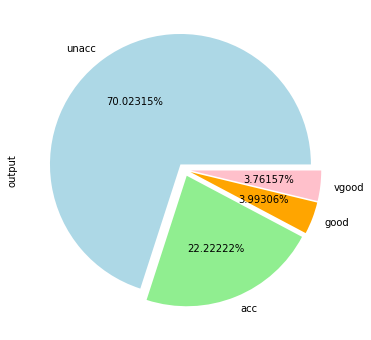

In [3]:
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
dataset.output.value_counts().plot(kind='pie', autopct='%0.05f%%', colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05, 0.05, 0.05,0.05))


proprecessing

In [5]:
# ouput 제외한 columns
categorical_columns = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety']

# data를 범주형으로 바꿈
for category in categorical_columns:
    dataset[category] = dataset[category].astype('category')

In [6]:
# 범주형 데어터를 텐서로 변환하는 코드
# category data --> ndarray --> Tensor
#.cat.codes <-- 범주형 데어터를 ndarray로 바꿔주는 코드
# np.stack은 두 개 이상의 ndarray 객체를 합칠때 사용.
import numpy as np

price = dataset['price'].cat.codes.values
maint = dataset['maint'].cat.codes.values
doors = dataset['doors'].cat.codes.values
persons = dataset['persons'].cat.codes.values
lug_capacity = dataset['lug_capacity'].cat.codes.values
safety = dataset['safety'].cat.codes.values

categorical_data = np.stack([price, maint, doors, persons, lug_capacity, safety], 1)
categorical_data[:10]

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       [3, 3, 0, 0, 1, 2],
       [3, 3, 0, 0, 1, 0],
       [3, 3, 0, 0, 0, 1],
       [3, 3, 0, 0, 0, 2],
       [3, 3, 0, 0, 0, 0],
       [3, 3, 0, 1, 2, 1]], dtype=int8)

In [9]:
#ndarray를 tensor로 전환
categorical_data = torch.tensor(categorical_data, dtype=torch.int64)
categorical_data[:10]

tensor([[3, 3, 0, 0, 2, 1],
        [3, 3, 0, 0, 2, 2],
        [3, 3, 0, 0, 2, 0],
        [3, 3, 0, 0, 1, 1],
        [3, 3, 0, 0, 1, 2],
        [3, 3, 0, 0, 1, 0],
        [3, 3, 0, 0, 0, 1],
        [3, 3, 0, 0, 0, 2],
        [3, 3, 0, 0, 0, 0],
        [3, 3, 0, 1, 2, 1]])

In [12]:
# 레이블(ouputs)로 사용할 column에 대해서도 tensor로 변환해줍니다. 
# get_dummies는 숫자는 그대로, category data는 one-hot vector로 만들어 줌

outputs = pd.get_dummies(dataset.output)
print(outputs)
outputs = outputs.values
print(outputs)
outputs = torch.tensor(outputs).flatten()
print(outputs)

print(categorical_data.shape)
print(outputs.shape)


      acc  good  unacc  vgood
0       0     0      1      0
1       0     0      1      0
2       0     0      1      0
3       0     0      1      0
4       0     0      1      0
...   ...   ...    ...    ...
1723    0     1      0      0
1724    0     0      0      1
1725    0     0      1      0
1726    0     1      0      0
1727    0     0      0      1

[1728 rows x 4 columns]
[[0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 ...
 [0 0 1 0]
 [0 1 0 0]
 [0 0 0 1]]
tensor([0, 0, 1,  ..., 0, 0, 1], dtype=torch.uint8)
torch.Size([1728, 6])
torch.Size([6912])


word embedding은 유사한 단어끼리 유사하게 인코딩 되면 좋음

단일 숫자로 변환된 ndarray를 N차원 embedding으로 바꿔서 사용

임베딩 크기에 대한 정환한 규칙은 없으나, 칼럼의 고유 값 수를 2로 나눈것을 많이 사용


In [13]:
categorical_column_sizes = [len(dataset[column].cat.categories) for column in categorical_columns] # 고유 값의 수 
categorical_embedding_sizes = [(col_size, min(50, (col_size+1)//2)) for col_size in categorical_column_sizes]
print(categorical_embedding_sizes)

[(4, 2), (4, 2), (4, 2), (3, 2), (3, 2), (3, 2)]


dataset 분리

In [29]:
total_records = 1728
test_records = int(total_records * .2) #20퍼만 test로

categorical_train_data = categorical_data[:total_records - test_records]
categorical_test_data = categorical_data[total_records - test_records:total_records]
train_outputs = outputs[:total_records - test_records]
test_outputs = outputs[total_records - test_records:total_records]

In [15]:
print(len(categorical_train_data))
print(len(train_outputs))
print(len(categorical_test_data))
print(len(test_outputs))

1383
1383
345
345


make model

In [18]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self, embedding_size, output_size, layers, p=0.4):
        super().__init__()
        self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_size]) #embedding size
        self.embedding_dropout = nn.Dropout(p)
        
        all_layers = [] # 모든 layer를 받아두려고 빈 array로 만듬
        num_categorical_cols = sum((nf for ni, nf in embedding_size))
        input_size = num_categorical_cols 

        # layer는 각 layer의 output size 지정
        for i in layers:
            all_layers.append(nn.Linear(input_size, i))
            all_layers.append(nn.ReLU(inplace=True))
            all_layers.append(nn.BatchNorm1d(i))
            all_layers.append(nn.Dropout(p))
            input_size = i

        all_layers.append(nn.Linear(layers[-1], output_size))
        self.layers = nn.Sequential(*all_layers)

    def forward(self, x_categorical):
        embeddings = []
        for i,e in enumerate(self.all_embeddings):
            embeddings.append(e(x_categorical[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.embedding_dropout(x)
        x = self.layers(x)
        return x

In [19]:
model = Model(categorical_embedding_sizes, 4, [200, 100, 50], p = 0.4)
print(model)

Model(
  (all_embeddings): ModuleList(
    (0): Embedding(4, 2)
    (1): Embedding(4, 2)
    (2): Embedding(4, 2)
    (3): Embedding(3, 2)
    (4): Embedding(3, 2)
    (5): Embedding(3, 2)
  )
  (embedding_dropout): Dropout(p=0.4, inplace=False)
  (layers): Sequential(
    (0): Linear(in_features=12, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=50, out_features=4, bias=True)
  )
)


model의 loss와 hyperparameter 정의

In [20]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

GPU 사용하기


In [22]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)

cuda


model 학습

In [30]:
epochs = 500
aggregated_losses = []
train_outputs = train_outputs.to(device=device, dtype=torch.int64)
for i in range(epochs):
    i += 1
    y_pred = model(categorical_train_data).to(device)
    single_loss = loss_function(y_pred, train_outputs)
    aggregated_losses.append(single_loss)

    if i%25 == 1: # 25번의 한번씩 모니터링
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

    optimizer.zero_grad()
    single_loss.backward() # weghit 업데이트 하기위해 손실함수의 backword()메서드 호출
    optimizer.step() # gradient update

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 0.57289404
epoch:  26 loss: 0.56973171
epoch:  51 loss: 0.57329839
epoch:  76 loss: 0.56094652
epoch: 101 loss: 0.56906742
epoch: 126 loss: 0.56550574
epoch: 151 loss: 0.56675291
epoch: 176 loss: 0.56177682
epoch: 201 loss: 0.55931497
epoch: 226 loss: 0.56092572
epoch: 251 loss: 0.55792385
epoch: 276 loss: 0.55874193
epoch: 301 loss: 0.56147635
epoch: 326 loss: 0.56202644
epoch: 351 loss: 0.55856752
epoch: 376 loss: 0.55275291
epoch: 401 loss: 0.55620700
epoch: 426 loss: 0.55064285
epoch: 451 loss: 0.55487597
epoch: 476 loss: 0.56183755
epoch: 500 loss: 0.5543729067


테스트 데이터셋으로 모델 예측


In [31]:
test_outputs = test_outputs.to(device=device, dtype=torch.int64) # test ouput을 gpu에 올린다.

with torch.no_grad(): # backpropagation 진행하지 않겠다
    y_val = model(categorical_test_data).to(device)
    loss = loss_function(y_val, test_outputs)
print(f'Loss: {loss:.8f}')

Loss: 0.52920914


In [32]:
print(y_val[:5])

tensor([[ 3.0324,  1.8712, -3.7042, -3.5658],
        [ 6.8597,  5.5508, -9.9066, -8.8994],
        [ 2.9375,  1.8433, -4.2890, -4.1433],
        [ 3.6718,  2.3227, -4.8819, -5.0386],
        [ 4.6646,  3.5820, -7.2880, -7.2588]], device='cuda:0')


In [33]:
# 예측 한거를 cpu로 내리고 ndarray로 변환 후 max값 취하자
y_val = np.argmax(y_val.cpu().numpy(), axis=1)
print(y_val[:5])
# 처음 5개는 0번째 category로 분류되는 거임

[0 0 0 0 0]


check score

In [34]:
import warnings
warnings.filterwarnings('ignore') 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

test_outputs = test_outputs.cpu().numpy() # cpu로 내리고, ndarray로 바꿈
print(confusion_matrix(test_outputs,y_val))
print(classification_report(test_outputs,y_val))
print(accuracy_score(test_outputs, y_val))

[[259   0]
 [ 84   2]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       259
           1       1.00      0.02      0.05        86

    accuracy                           0.76       345
   macro avg       0.88      0.51      0.45       345
weighted avg       0.82      0.76      0.66       345

0.7565217391304347
